# Assignment 1: Analysis of the MovieLens Dataset


**Team Members:**

- Salma Hisham Mohamed _ 231000533
- Abdelrahman khaled Ibrahim_ 211001429
- Norhan Mohamed Swar   _ 231000486
____

# `00` Import Required Dependencies

## `0.1` Install Dependencies

In [2]:
pip install pyzipcode plotly datasketch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 13.1 MB/s eta 0:00:00
  Created wheel for pyzipcode: filename=pyzipcode-3.0.1-py3-none-any.whl size=1932161 sha256=987d3daf27c4287ac825facee40fd6776422b1a2b3b8150fc6b8b02b6e805ef3
  Stored in directory: /root/.cache/pip/wheels/33/11/bb/75313afc9ef5609e3997d374a6f6c4d48932fdb8ed8fe2ea77
Successfully built pyzipcode


## `0.2` Import Dependencies

In [3]:
# for manipulation
import numpy as np
import pandas as pd
# visulaization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Retrieve geo coordinates from the subset of zip codes
from pyzipcode import ZipCodeDatabase
# for map reduce functions
from functools import reduce
# for hashing
from datasketch import MinHash, MinHashLSH


# `01` Read the Dataset

In [5]:
# Read the .dat file of '::' as delimiter into a pandas DataFrame
#users_df = pd.read_csv("dataset/users.dat", delimiter='::', header= None, engine='python', encoding='latin-1')
#movies_df = pd.read_csv("dataset/movies.dat", delimiter='::', header= None, engine='python', encoding='latin-1')
#ratings_df = pd.read_csv("dataset/ratings.dat", delimiter='::', header= None, engine='python', encoding='latin-1')
users_df = pd.read_csv("/content/drive/MyDrive/Career/Master/Data Mining/ml-1m/users.dat", delimiter='::', header= None, engine='python', encoding='latin-1')
movies_df = pd.read_csv("/content/drive/MyDrive/Career/Master/Data Mining/ml-1m/movies.dat", delimiter='::', header= None, engine='python', encoding='latin-1')
ratings_df = pd.read_csv("/content/drive/MyDrive/Career/Master/Data Mining/ml-1m/ratings.dat", delimiter='::', header= None, engine='python', encoding='latin-1')



print("Users Dataframe info :\n", users_df.info())
print("Movies Dataframe info :\n", movies_df.info())
print("Rating Dataframe info :\n", ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6040 non-null   int64 
 1   1       6040 non-null   object
 2   2       6040 non-null   int64 
 3   3       6040 non-null   int64 
 4   4       6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB
Users Dataframe info :
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   int64 
 1   1       3883 non-null   object
 2   2       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
Movies Dataframe info :
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   0  

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Specify column names written in data README file
users_df_column_names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
movies_df_column_names = ['MovieID', 'Title', 'Genres']
ratings_df_column_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']

# Assign column names to the DataFrame
users_df.columns = users_df_column_names
movies_df.columns = movies_df_column_names
ratings_df.columns = ratings_df_column_names

In [7]:
# Merge dataframes
merged_df = pd.merge(pd.merge(ratings_df, users_df, on='UserID'), movies_df, on='MovieID')
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


# `02` Exploratory Data Analysis

In [8]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [9]:
# check Nulls
nulls_df = merged_df.isnull().sum().sort_values(ascending=False).reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count


In [10]:
# Check Duplicates
merged_df.duplicated().sum()

0

M    4331
F    1709
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

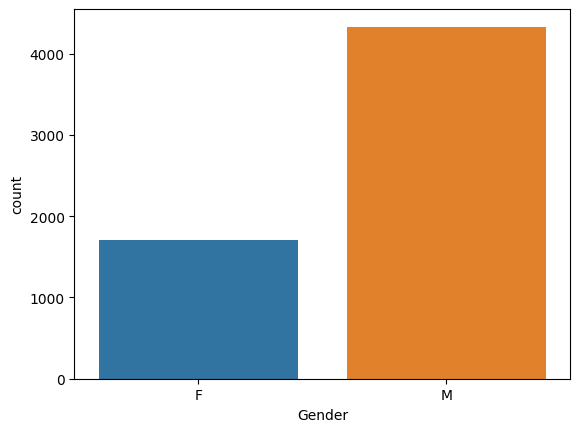

In [11]:
# Print the value counts with the gender feature
print(users_df['Gender'].value_counts())
sns.countplot(x='Gender', data=users_df)

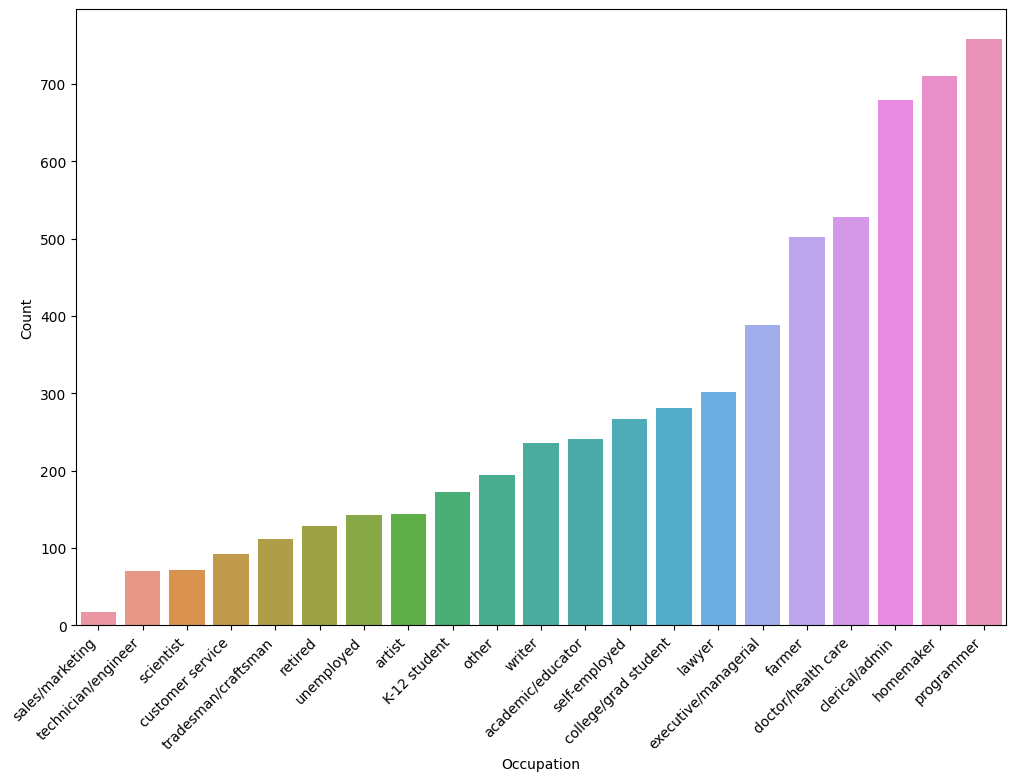

In [12]:
# Getting the Occupation values from the data README file
Occupation_labels = ["other" ,"academic/educator" ,"artist" ,"clerical/admin"
                    ,"college/grad student" ,"customer service" ,"doctor/health care" ,"executive/managerial"
                    ,"farmer" ,"homemaker" ,"K-12 student" ,"lawyer" ,"programmer"
                    ,"retired" ,"sales/marketing" ,"scientist" ,"self-employed" ,"technician/engineer"
                    ,"tradesman/craftsman" ,"unemployed" ,"writer"]

# Create an Occupation DataFrame with counts and Occupation labels
Occupation_cnt_df = users_df['Occupation'].value_counts().reset_index()
# Remane the columns
Occupation_cnt_df.columns = ['Occupation', 'Count']
# Map the original 'Occupation' values with Occupation labels for better readability
Occupation_cnt_df['Occupation'] = Occupation_cnt_df['Occupation'].map(dict(zip(users_df['Occupation'].unique(), Occupation_labels)))
# Sort the DataFrame by the 'Count' column
Occupation_cnt_df = Occupation_cnt_df.sort_values(by='Count')
# Create a bar plot using the Occupation DataFrame
plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation', y='Count', data=Occupation_cnt_df)
# Show the plot
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
Occupation_cnt_df.head()

,Occupation,Count
20,sales/marketing,17
19,technician/engineer,70
18,scientist,72
17,customer service,92
16,tradesman/craftsman,112


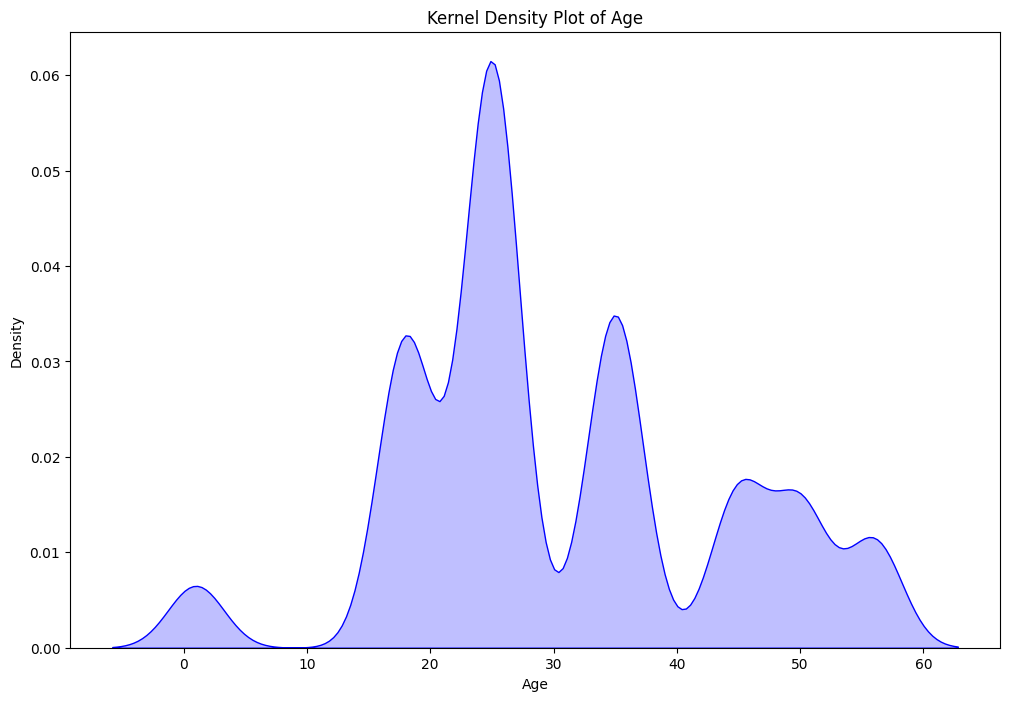

In [14]:
# Examine the 'Age' ranges in our Data that watch movies the most.
plt.figure(figsize=(12, 8))
sns.kdeplot(data=users_df, x='Age', fill=True, color='blue')

plt.title('Kernel Density Plot of Age')
plt.show()

In [15]:
merged_df['Genres'].value_counts()

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 301, dtype: int64

After conducting a light exploratory data analysis (EDA)


- it's evident that the majority of views come from individuals in the programming occupation.
- the most active movie watchers fall within the age range of 20 to 30.
- dataset is skewed towards men.
- However the dataset is skewed towards men, Surprisingly, the top-viewed genre is comedy. 😄



This was the easy way. Now we are converting our investigation towards Map Reduce jobs for practicing purposes.

`Task1: Practice MapReduce for Data Preprocessing`

•	**Objective:** Prepare and clean the dataset for analysis.

•	**Task:** Process the dataset to extract key information like user ratings, movie genres, and user activity.

•	**Implementation:** Write simple MapReduce jobs to filter and aggregate data. For instance, count the number of ratings per movie.


# `03` Preprocessing Using MapReduce

## `3.1` MapReduce for Top-Rated Movies

In [16]:
# Map function for Average Ratings
def map_average_ratings(row):
    key = row.get('MovieID', 'Unknown')
    value = {'Rating': row.get('Rating', 0), 'TotalUsers': 1}
    return (key, value)

# Reduce function for Average Ratings
def reduce_average_ratings(mapped_data):
    result = []
    grouped_data = {}

    for movie_id, rating_info in mapped_data:
        if movie_id not in grouped_data:
            grouped_data[movie_id] = {'Rating': 0, 'TotalUsers': 0}

        grouped_data[movie_id]['Rating'] += rating_info['Rating']
        grouped_data[movie_id]['TotalUsers'] += rating_info['TotalUsers']

    for movie_id, info in grouped_data.items():
        avg_rate = info['Rating'] / info['TotalUsers']
        result.append({"MovieID": movie_id, "AvgRating": avg_rate, "TotalRatings": info['TotalUsers']})

    return result

In [17]:
# Map
average_ratings_mapped = [map_average_ratings(row) for index, row in merged_df[['MovieID', 'Rating']].iterrows()]
# Reduce
average_ratings_reduced = reduce_average_ratings(average_ratings_mapped)

# Convert the result to a DataFrame
result_df = pd.DataFrame(average_ratings_reduced)
result_df

,MovieID,AvgRating,TotalRatings
0,1193,4.390725,1725
1,661,3.464762,525
2,914,4.154088,636
3,3408,3.863878,1315
4,2355,3.854375,1703
...,...,...,...
3701,2198,4.000000,2
3702,2703,3.000000,1
3703,2845,1.000000,1
3704,3607,5.000000,1


In [18]:
# Merge result_df with movies_df to get movie names
movies_df = pd.merge(result_df, movies_df[['MovieID', 'Title', 'Genres']], on='MovieID')

# Select top 10 movies with more than 500 ratings
sorted_movies = movies_df[movies_df['TotalRatings'] > 500].sort_values(by=['AvgRating', 'TotalRatings'], ascending=False)[:10]
top_10_movies = sorted_movies.head(10)
print("Top 10 Movies by Average Rating > 500")
top_10_movies

Top 10 Movies by Average Rating > 500


,MovieID,AvgRating,TotalRatings,Title,Genres
1092,2019,4.560510,628,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama
167,318,4.554558,2227,"Shawshank Redemption, The (1994)",Drama
669,858,4.524966,2223,"Godfather, The (1972)",Action|Crime|Drama
29,745,4.520548,657,"Close Shave, A (1995)",Animation|Comedy|Thriller
259,50,4.517106,1783,"Usual Suspects, The (1995)",Crime|Thriller
23,527,4.510417,2304,Schindler's List (1993),Drama|War
535,1148,4.507937,882,"Wrong Trousers, The (1993)",Animation|Comedy
127,1198,4.477725,2514,Raiders of the Lost Ark (1981),Action|Adventure
629,904,4.476190,1050,Rear Window (1954),Mystery|Thriller
44,260,4.453694,2991,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi


`Seven Samurai, Shawshank Redemption, and The Godfather are the top three movies according to the highest AVG rating, which received more than 500 ratings.`

## `3.2` MapReduce for Most Popular Genres

In [19]:
# Map function for Most Popular Genres
def map_popular_genres(row):
    genres = row['Genres'].split('|')
    return [(genre, 1) for genre in genres]

# Reduce function for Most Popular Genres
def reduce_popular_genres(mapped_data):
    result = {}
    for genre, rating in mapped_data:
        if genre in result:
            result[genre] += rating
        else:
            result[genre] = rating
    return result


In [20]:
# Map
popular_genres_mapped = [item for sublist in movies_df.apply(map_popular_genres, axis=1) for item in sublist]
# Reduce
popular_genres_reduced = reduce_popular_genres(popular_genres_mapped)

# Convert to DataFrame and sort it based on total rating
result_df = pd.DataFrame(list(popular_genres_reduced.items()), columns=['Genre', 'TotalRatings']).sort_values(by=['TotalRatings'], ascending=False)
result_df

,Genre,TotalRatings
0,Drama,1493
5,Comedy,1163
6,Action,495
11,Thriller,485
4,Romance,459
15,Horror,339
7,Adventure,281
9,Sci-Fi,274
2,Children's,250
12,Crime,201


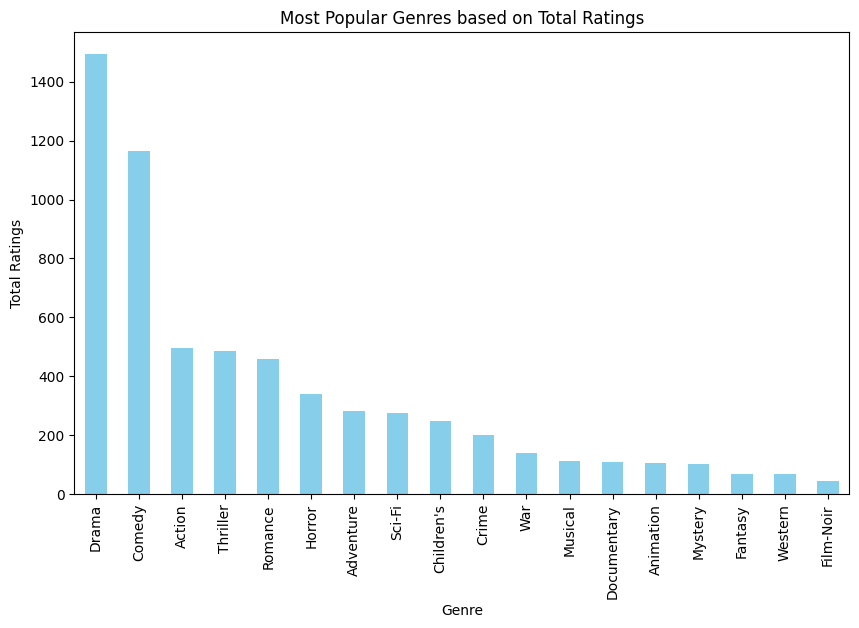

In [21]:
# Plotting
result_df.plot(kind='bar', x='Genre', y='TotalRatings', color='skyblue', legend=False, figsize=(10, 6))
plt.xlabel('Genre')
plt.ylabel('Total Ratings')
plt.title('Most Popular Genres based on Total Ratings')
plt.show()

`Comedy was the first EDA genre based on the average rating, but according on the total rating here, drama is the most popular genre overall.`

## `3.3` MapReduce for Gender Preferences

In [22]:
# Map function for Gender Group Preferences Genres
def map_gender_preferences(row):
    age = row['Age']
    gender = row['Gender']
    genres = row['Genres'].split('|')
    return [((gender, age, genre), 1) for genre in genres]

# Reduce function for Gender Group Preferences Genres
def reduce_gender_preferences(mapped_data):
    result = {}
    for (gender, age, genre), views in mapped_data:
        if (gender, age, genre) in result:
            result[(gender, age, genre)] += views
        else:
            result[(gender, age, genre)] = views
    return result

In [23]:
# Map
gender_preferences_mapped = [item for sublist in merged_df.apply(map_gender_preferences, axis=1) for item in sublist]

# Reduce
gender_preferences_reduced = reduce_gender_preferences(gender_preferences_mapped)

# Convert to DataFrame
gender_preferences_df = pd.DataFrame(list(gender_preferences_reduced.items()), columns=['Gender_Age_Genre', 'views'])
gender_preferences_df[['Gender', 'Age', 'Genre']] = pd.DataFrame(gender_preferences_df['Gender_Age_Genre'].tolist(), index=gender_preferences_df.index)
gender_preferences_df.drop(columns=['Gender_Age_Genre'], inplace=True)


In [24]:
# Sort and get the top genre for each gender and age group
top_genre_by_age_gender = gender_preferences_df.sort_values(by=['Gender', 'views'], ascending=[False, False])

# Display the result
top_genre_by_age_gender


,views,Gender,Age,Genre
71,106327,M,25,Comedy
2,101643,M,25,Drama
86,88531,M,25,Action
155,62190,M,25,Thriller
127,53039,M,25,Sci-Fi
...,...,...,...,...
244,167,F,50,Documentary
207,91,F,1,Western
235,80,F,1,Film-Noir
249,72,F,56,Documentary


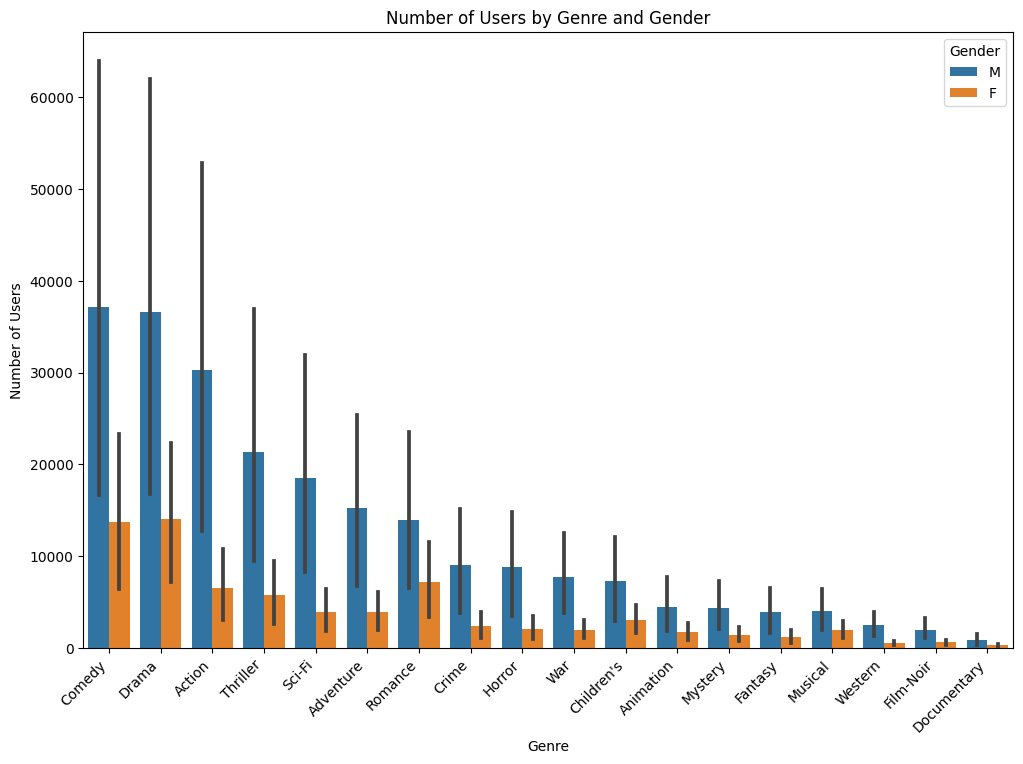

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Genre', y='views', hue='Gender', data=top_genre_by_age_gender)
plt.title('Number of Users by Genre and Gender')
plt.xlabel('Genre')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

`This graph indicates that males like comedy while women tend to appreciate drama the most.`

## `3.4` MapReduce for User Demographics Distribution

##### Retrieve geo coordinates from the subset of zip codes

In [26]:
# Retrieve geo coordinates from the subset of zip codes
zcdb = ZipCodeDatabase()

# Assuming 'Zip-code' is a column in your DataFrame
users_df['Zip-code_info'] = users_df['Zip-code'].apply(lambda x: zcdb[x] if x in zcdb else None)

# Extract specific information from the 'Zip-code_info' column
users_df['City'] = users_df['Zip-code_info'].apply(lambda x: x.city if x is not None else None)
users_df['State'] = users_df['Zip-code_info'].apply(lambda x: x.state if x is not None else None)
users_df['Latitude'] = users_df['Zip-code_info'].apply(lambda x: x.latitude if x is not None else None)
users_df['Longitude'] = users_df['Zip-code_info'].apply(lambda x: x.longitude if x is not None else None)

# Drop the 'Zip-code_info' column if you no longer need it
users_df = users_df.drop(columns=['Zip-code_info', 'Zip-code'])

In [27]:
users_df.head()

,UserID,Gender,Age,Occupation,City,State,Latitude,Longitude
0,1,F,1,10,Royal Oak,MI,42.488735,-83.13752
1,2,M,56,16,Marrero,LA,29.869283,-90.10933
2,3,M,25,15,Saint Paul,MN,44.989065,-93.10666
3,4,M,45,7,Newtonville,MA,42.352996,-71.20907
4,5,M,25,20,Minneapolis,MN,44.971965,-93.23588


In [28]:
# check Nulls
nulls_df = users_df[['City',	'State',	'Latitude',	'Longitude']].isnull().sum().sort_values(ascending=False).reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count
0,City,137
1,State,137
2,Latitude,137
3,Longitude,137


In [29]:
# since the number of nulls in these row is very small, we can simply drop them
users_df = users_df.dropna(axis = 0, subset = ['City',	'State',	'Latitude',	'Longitude'])

In [30]:
# Merge DataFrames (assuming there is a common key, e.g., MovieID)
updated_merged_df = pd.merge(pd.merge(ratings_df, users_df, on='UserID'), movies_df, on='MovieID')
updated_merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,City,State,Latitude,Longitude,AvgRating,TotalRatings,Title,Genres
0,1,1193,5,978300760,F,1,10,Royal Oak,MI,42.488735,-83.137520,4.390725,1725,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,Marrero,LA,29.869283,-90.109330,4.390725,1725,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,Winter Park,FL,28.566338,-81.260818,4.390725,1725,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,Charlottesville,VA,38.026342,-78.534800,4.390725,1725,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,Modesto,CA,37.671778,-121.012490,4.390725,1725,One Flew Over the Cuckoo's Nest (1975),Drama


##### Perform the Map Reduce

In [31]:
# Map function for user activity by state and gender
def map_user_activity(row):
    state = row['State']
    genres = row['Genres'].split('|')
    return [((state, genre), 1) for genre in genres]

# Reduce function for user activity by state and genre
def reduce_user_activity(mapped_data):
    result = {}
    for (state, genre), count in mapped_data:
        if (state, genre) in result:
            result[(state, genre)] += count
        else:
            result[(state, genre)] = count
    return result

In [32]:
# Map
user_activity_mapped = [item for sublist in updated_merged_df.apply(map_user_activity, axis=1) for item in sublist]

# Reduce
user_activity_reduced = reduce_user_activity(user_activity_mapped)

# Convert to DataFrame
user_activity_df = pd.DataFrame(list(user_activity_reduced.items()), columns=['State_Genre', 'views'])
user_activity_df[['State', 'Genre']] = pd.DataFrame(user_activity_df['State_Genre'].tolist(), index=user_activity_df.index)
user_activity_df.drop(columns=['State_Genre'], inplace=True)
user_activity_df.head()

,views,State,Genre
0,11803,MI,Drama
1,1993,LA,Drama
2,9199,FL,Drama
3,10262,VA,Drama
4,65710,CA,Drama


In [33]:
# Get the top 3 genres for each state
top_genres_by_state = user_activity_df.groupby('State').apply(lambda x: x.nlargest(3, 'views')).reset_index(drop=False)
top_genres_by_state.head()

ValueError: ignored

In [ ]:
fig = px.choropleth(top_genres_by_state,
                    locations='State', locationmode="USA-states",
                    color='views',
                    color_continuous_scale="Viridis",
                    scope="usa",
                    title="Top Active State with Top 3 Genres for Each",
                    hover_data=['State', 'Genre', 'views'],
                    labels={'views rate'}
                    )
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

`Here we can receive the amount of participants from each state with their preferred genre, as demonstrated in California, which appears to be the top among Drama.`

# `04` PageRank for Movie Popularity Analysis

`Task2: PageRank for Movie Popularity Analysis`
•	**Objective**: Use a modified PageRank algorithm to rank movies based on user ratings and interactions.

•	**Task**: Construct a graph where nodes represent movies, and edges represent user ratings. Movies frequently rated together have stronger connections.

•	**Implementation**: Apply a simplified PageRank algorithm to this graph to determine movie popularity.


In [35]:
import networkx as nx

# Step 1: Build a Graph
movieGraph = nx.Graph()

for i, row in top_10_movies.iterrows():
    # make 'MovieID' is used as the node identifier
    source_node = row['Title']

    # edges represent user average rating 'AvgRating'
    for j, other_row in top_10_movies.iterrows():
        if i != j:
            target_node = other_row['Title']
            avg_rating_similarity = abs(row['AvgRating'] - other_row['AvgRating'])

            # Add edge with weight based on 'AvgRating' similarity
            movieGraph.add_edge(source_node, target_node, weight=avg_rating_similarity)

In [36]:
# Get positions for the nodes in network
pos = nx.spring_layout(movieGraph, seed=11)

# Get PageRank of all the Heros
pageRank = nx.pagerank(movieGraph, weight='weight')

# Sort PageRank descending order
pageRankSorted = sorted(pageRank.items(), key=lambda item: item[1], reverse=True)

# movie with the heighest Connections aka pagerank
topMovie = pageRankSorted[:10]
print(topMovie)

[('Star Wars: Episode IV - A New Hope (1977)', 0.15121842750285447), ('Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)', 0.1350724580878315), ('Shawshank Redemption, The (1994)', 0.12351712187252804), ('Rear Window (1954)', 0.10744654434051418), ('Raiders of the Lost Ark (1981)', 0.10518589081512973), ('Godfather, The (1972)', 0.07975756305014733), ('Close Shave, A (1995)', 0.07539210368944711), ('Wrong Trousers, The (1993)', 0.07498038511745153), ("Schindler's List (1993)", 0.07373235483040047), ('Usual Suspects, The (1995)', 0.07369715069369581)]


In [37]:
nodeSizes = [pageRank[node] * 90000 for node in movieGraph.nodes()]

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


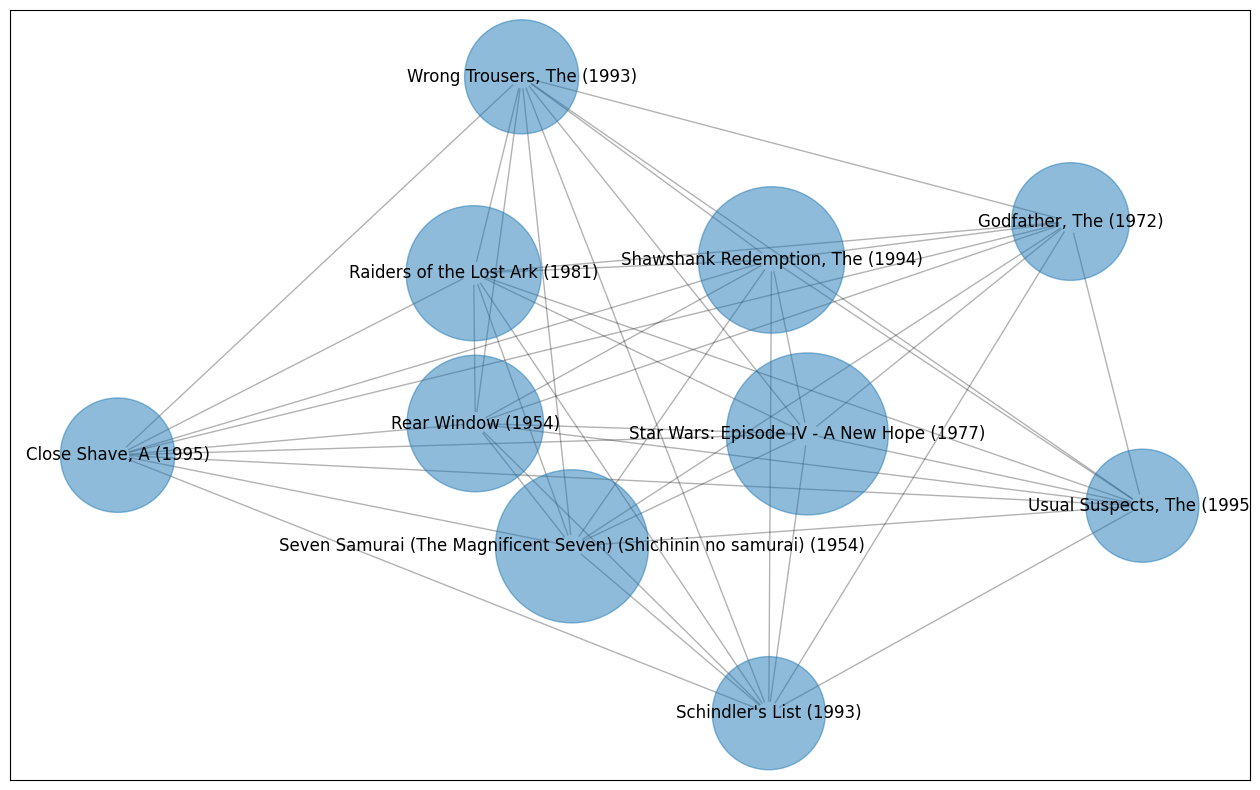

In [38]:
plt.figure(figsize=(16, 10))
# Use nx.draw_networkx_nodes to draw nodes and use nodeSizes to specify each node size
nx.draw_networkx_nodes(movieGraph, pos, node_size=nodeSizes, cmap=plt.cm.Dark2, alpha=0.5)

# Draw a directed edges using draw_networkx_edges
nx.draw_networkx_edges(movieGraph, pos, alpha=0.3,arrows=True)

# Draw labels
nx.draw_networkx_labels(movieGraph, pos)

plt.show()

`Task3: Perform Locality Sensitive Hashing for Similar Movie Discovery`

•	**Objective**: Group similar movies based on user ratings.

•	**Task**: Create high-dimensional vectors for each movie based on user ratings.

•	**Implementation**: Implement a basic LSH algorithm to cluster movies with similar rating patterns.


# `05` Locality Sensitive Hashing for Similar Movie Discovery

## `5.1` Shingling

In [39]:
def shingling(ratings):
    """
    This function takes a list of ratings and returns a set of shingles.

    A shingle is a sequence of n consecutive items from a list. In this case,
    the items are the ratings.

    Args:
        ratings (list): A list of ratings.

    Returns:
        set: A set of shingles.
    """

    if isinstance(ratings, float):
        # Check if the input is a single rating and convert it to a list
        ratings = [ratings]

    shingles = set()  # Initialize an empty set to store shingles

    for rating in ratings:
        # Add each rating as a shingle to the set
        shingles.add(str(rating))

    return shingles


In [40]:
movies_df['Shingles'] = movies_df['AvgRating'].apply(shingling)
movies_df['Shingles']

0        {4.390724637681159}
1       {3.4647619047619047}
2        {4.154088050314465}
3        {3.863878326996198}
4        {3.854374633000587}
                ...         
3701                   {4.0}
3702                   {3.0}
3703                   {1.0}
3704                   {5.0}
3705                   {4.0}
Name: Shingles, Length: 3706, dtype: object

## `5.2` Min Hashing

In [41]:
def minhashing(shingles, num_perm):
    """
    This function takes a set of shingles and a number of permutations and returns a MinHash object.

    MinHash is a dimensionality reduction technique that projects high-dimensional data into a lower-dimensional space.
    It is commonly used for near neighbor search and clustering.

    Args:
        shingles (set): A set of shingles.
        num_perm (int): The number of permutations to use.

    Returns:
        MinHash: A MinHash object.
    """

    minhash = MinHash(num_perm=num_perm)  # Create a MinHash object with the specified number of permutations

    for shingle in shingles:  # Iterate through each shingle
        minhash.update(shingle.encode('utf-8'))  # Hash the shingle and update the MinHash object
    print(minhash.digest())
    return minhash


In [42]:
num_perm = 128  # Adjust the number of permutations as per your requirements

movies_df['Signature'] = movies_df['Shingles'].apply(minhashing, num_perm=num_perm)


Streaming output truncated to the last 5000 lines.
  411595024 2093614464  560337110 1767327306 2169015442 2283719165
 3573501684 3051635864  885087760 3584882640  595051140 3618866985
 2228459336 3432439200 2412531003  127116295 4100984804 4170334056
 3270167353 3683322155 2966426805 3946543273 3790441085 2873517407
 2475683261 2190821092 3308852592 3626296438 1214285422 1739929002
  783451233 1494494035]
[3250073226 3705177447 2916656899 1123360040  295160652 1223927844
 3404376682 3075692504 3504987501 1625030907 3914159564 1685221375
 2805920785 3434327471 2639537480 3542980340  613957361  663791269
  178237505 3491962489 4084866331 1047255073 3342407112  457695033
  810718371 4034403963 3773233518 3345450156  915403784  657249194
 2064970112 2964889114 4209673361 2192324358 2146571321  184587240
 1726520993 3504499452 3677631695 1228133544 4207674320 3033778130
 3662109086 1566609576  789633322 1481606541 2564447750  966841731
  590220418 3485229215 1205983732 1237726280 323081175

## `5.3` LSH Clustering

In [43]:

def lsh_clustering(df, threshold):
    # Create an instance of MinHashLSH with the given threshold
    lsh = MinHashLSH(threshold=threshold)

    # Insert each signature into the LSH index
    for i, signature in enumerate(df['Signature']):
        lsh.insert(i, signature)

    # Initialize a dictionary to store the clusters
    clusters = {}

    # Assign each signature to a cluster
    for i, signature in enumerate(df['Signature']):
        cluster_id = None

        # Query the LSH index to find similar signatures
        for key in lsh.query(signature):
            if key in clusters:
                cluster_id = clusters[key]
                break

        # If no similar signature is found, assign a new cluster ID
        if cluster_id is None:
            cluster_id = len(clusters) + 1

        # Assign the current signature to the cluster
        clusters[i] = cluster_id

    # Return the clusters dictionary
    return clusters

threshold = 0.5  # Adjust the threshold as per your requirements
clusters = lsh_clustering(movies_df, threshold)


In [44]:
# Add cluster labels to the DataFrame
movies_df['Cluster'] = movies_df.index.map(clusters)

# Print the resulting clusters
for cluster_id, group in movies_df.groupby('Cluster'):
    print(f"Cluster {cluster_id}:")
    print(group[['MovieID', 'AvgRating', 'Title']])
    print()

Streaming output truncated to the last 5000 lines.
Cluster 1639:
      MovieID  AvgRating             Title
1638     3091   4.283688  Kagemusha (1980)

Cluster 1640:
      MovieID  AvgRating                 Title
1639      965   4.075099  39 Steps, The (1935)

Cluster 1641:
      MovieID  AvgRating                                Title
1640     3320   3.511111  Mifune (Mifunes sidste sang) (1999)

Cluster 1642:
      MovieID  AvgRating           Title
1641     1078   3.836022  Bananas (1971)

Cluster 1643:
      MovieID  AvgRating              Title
1642     2385   2.575342  Home Fries (1998)

Cluster 1644:
      MovieID  AvgRating                Title
1643     3831    3.72043  Saving Grace (2000)

Cluster 1645:
      MovieID  AvgRating                   Title
1644     1081   3.617512  Victor/Victoria (1982)

Cluster 1646:
      MovieID  AvgRating                                              Title
1645     2969   3.912088  Man and a Woman, A (Un Homme et une Femme) (1966)

Cluster 1647: